## RNN의 한계

RNN은 현재의 문제를 해결하는데 이전의 정보를 함께 고려한다. 하지만, 실제로도 그럴까? 사실 상황에 따라 다르다고 할 수 있다. 아래에 두가지 문장을 준비했다. 이 문장들 각각 뒤에 어떤 말이 이어질지 유추해보도록 하자. 

1. 오늘은 하늘이 ___________ .

2. 당신은 20명을 태운 버스를 운행하고 있습니다. 이번 정류장에서 5 명이 내렸고, 3명이 탔습니다. 다음 정류장에서는 7명이 내리고, 4명이 탔습니다.  그리고 그 다음 정류장에서는 1명이 내리고, 3명이 탔습니다. 그리고, 버스 기사의 나이는 ____________ 입니다.

1 번 문장의 경우, '오늘' 과 '하늘'만 기억 한다면. 빈 칸에 채울 단어로 '맑다', '흐리다' 등을 쉽게 떠올릴 수 있다. 하지만 2번 문장 같은 경우 빈칸을 예측하기 위해 필요한 정보는 문장의 가장 처음에 있다. '당신', '버스를 운행하고 있습니다.' 이 두 정보만 기억하고 있다면, 쉽게 빈 칸을 채울 수 있었다. 하지만 정보를 사용하는 지점과 해당 정보의 위치 간의 거리가 멀어서 아마 독자 중에서도 몇명은 이 빈칸을 못 채웠을지도 모른다. (참고로 버스 기사의 나이는 "당신"의 나이이다.)

1번 문장과 같이 현재 시점을 예측하는데 필요한 문맥이 가까이 있고 많지 않다면 RNN은 이를 학습할 수 있다. 하지만, 2번 문장 처럼, 정보를 필요로하는 시점과, 필요한 정보가 멀리 떨어져있다면 RNN은 잘 예측할 수 없다. 이 문제를 "Long-term dependency"라고 한다. 이 문제를 해결하기 위해 고안된 것이 LSTM이다. 

## LSTM

Long Short Term Memory, 줄여서 LSTM은 멀리 떨어져있는 정보 또한 활용하도록 학습 할 수 있다. 다음 그림은 LSTM의 구조를 도식화 한것이다. 

<img src="https://datascienceschool.net/upfiles/adcc93edb31e4ad289fb198f2f8d1ae6.png" style="width: 100%;">

그림 58.8 : LSTM 모형

구조가 어려워 보일 수 도 있겠다. LSTM의 연산은 다음처럼 여러 단계로 나누어져있다. 

1. 망각게이트
2. 입력게이트
3. Cell state 갱신 
4. 현재 셀의 출력값 계산 

하나하나씩 살펴보도록 하자. 

1. 망각게이트(forget gate)

망각게이트는 $t$ 시점에서의 입력값$(x_t)$과 이전 $t-1$시점에서의 출력값$(h_{t-1})$을 입력받아 이전 셀의 정보를 망각할지 말지 결정한다. 망각게이트의 출력값을 $f_t$라고 할 때 수식으로 전개하면 다음과 같다. 다음 식에서는 $\sigma$는 시그모이드 함수를 의미하고, $W_f$ 와 $b_f$ 망각게이트의 가중치와 바이어스를 의미한다. 

$$
f_t = \sigma(W_f[h_{t-1},x_t] + b_f)
$$

그리고 이 값은 이 후에 cell state, $C_{t-1}$에 곱해진다. 시그모이드 함수를 거치기 때문에 $f_t$는 0 ~ 1 사이의 값을 가진다. 이 값은 이전 cell state에 곱해지기 때문에 0에 다가갈수록 이전의 정보를 잊고 1에 다가갈수록 이전의 정보를 기억하도록한다. 다르게 해석하면 현재의 정보가 중요하면 이전의 정보를 잊게 할 것이고 현재의 정보가 필요없다면 이전의 정보를 기억하도록 할 것이다. 

<img src="https://datascienceschool.net/upfiles/64b3dbd7e5e94646b74f331948a175bf.png" style="width: 100%;">

그림 58.9 : LSTM 모형

2. 입력게이트 

입력게이트는 $t$ 시점에서의 입력값$(x_t)$과 이전 $t-1$시점에서의 출력값$(h_{t-1})$을 입력받고 현재의 정보를 다음 시점으로 전해질 cell state에 얼마나 반영할 지를 결정한다. $i_t$를 입력게이트의 출력값이라 했을 때 수식으로 정리하면 다음과 같다. 

$$
i_t = \sigma(W_i[h_{t-1},x_t] + b_i)
$$

<img src="https://datascienceschool.net/upfiles/4896a96694bd4ebbbd1c12c155e105bb.png" style="width: 100%;">

그림 58.9 : LSTM 모형

$3$. cell state 갱신 

입력값$(x_t)$과 이전 $t-1$시점에서의 출력값$(h_{t-1})$을 입력받고 이번엔 하이퍼탄젠트 함수를 사용해 $\tilde{C}_t$를 생성하고 입력게이트의 출력과 Hadamard 곱$(\odot)$을 한다. 그리고 이 값과 망각게이트의 출력을 이용해 cell state를 다음 수식과 같이 갱신한다. 

$$
\begin{eqnarray}
\tilde{C}_t &=& \tanh(W_C[h_{t-1}, x_t] + b_C) \\ 
C_t &=& C_{t-1} \odot f_t + i_t \odot \tilde{C}_t
\end{eqnarray}
$$

<img src="https://datascienceschool.net/upfiles/0cd61c6446464a589ec03565bd6f1812.png" style="width: 100%;">

그림 58.9 : LSTM 모형

$4$. 현재 셀의 출력값 계산 

현재 셀의 출력값 $h_t$은 다음 수식처럼 계산한다.

$$
\begin{eqnarray}
o_t &=& \sigma(W_o [h_{t-1}. x_t] + b_0) \\
h_t &=& o_t \odot \tanh(C_t)
\end {eqnarray}
$$

<img src="https://datascienceschool.net/upfiles/b392641f47914bdbb340d3cc5b533394.png" style="width: 100%;">

그림 58.9 : LSTM 모형

LSTM은 4개의 가중치 셋을 가진다. 

* 가중치

$$
\begin{eqnarray}
W_f, \ b_f \\
W_i, \ b_i \\
W_C, \ b_C \\
W_o, \ b_o
\end{eqnarray}
$$

그리고 하나의 LSTM 셀은 두 가지의 출력값을 가진다. 

* 출력값
$$
\begin{eqnarray}
h_t &=& o_t \odot \tanh(C_t)\\
C_t &=& f_t \odot C_{t-1} + i_t \odot \tilde C_t \\ 
\end{eqnarray}
$$

## Keras를 사용한 LSTM 구현

LSTM을 이용해 시계열 예측을 구현하고 RNN, ARMA 모형과 비교한다. 사용하는 데이터는 "영국의 호흡기 질환으로 인한 사망자 수" 시계열 데이터이다.

In [1]:
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


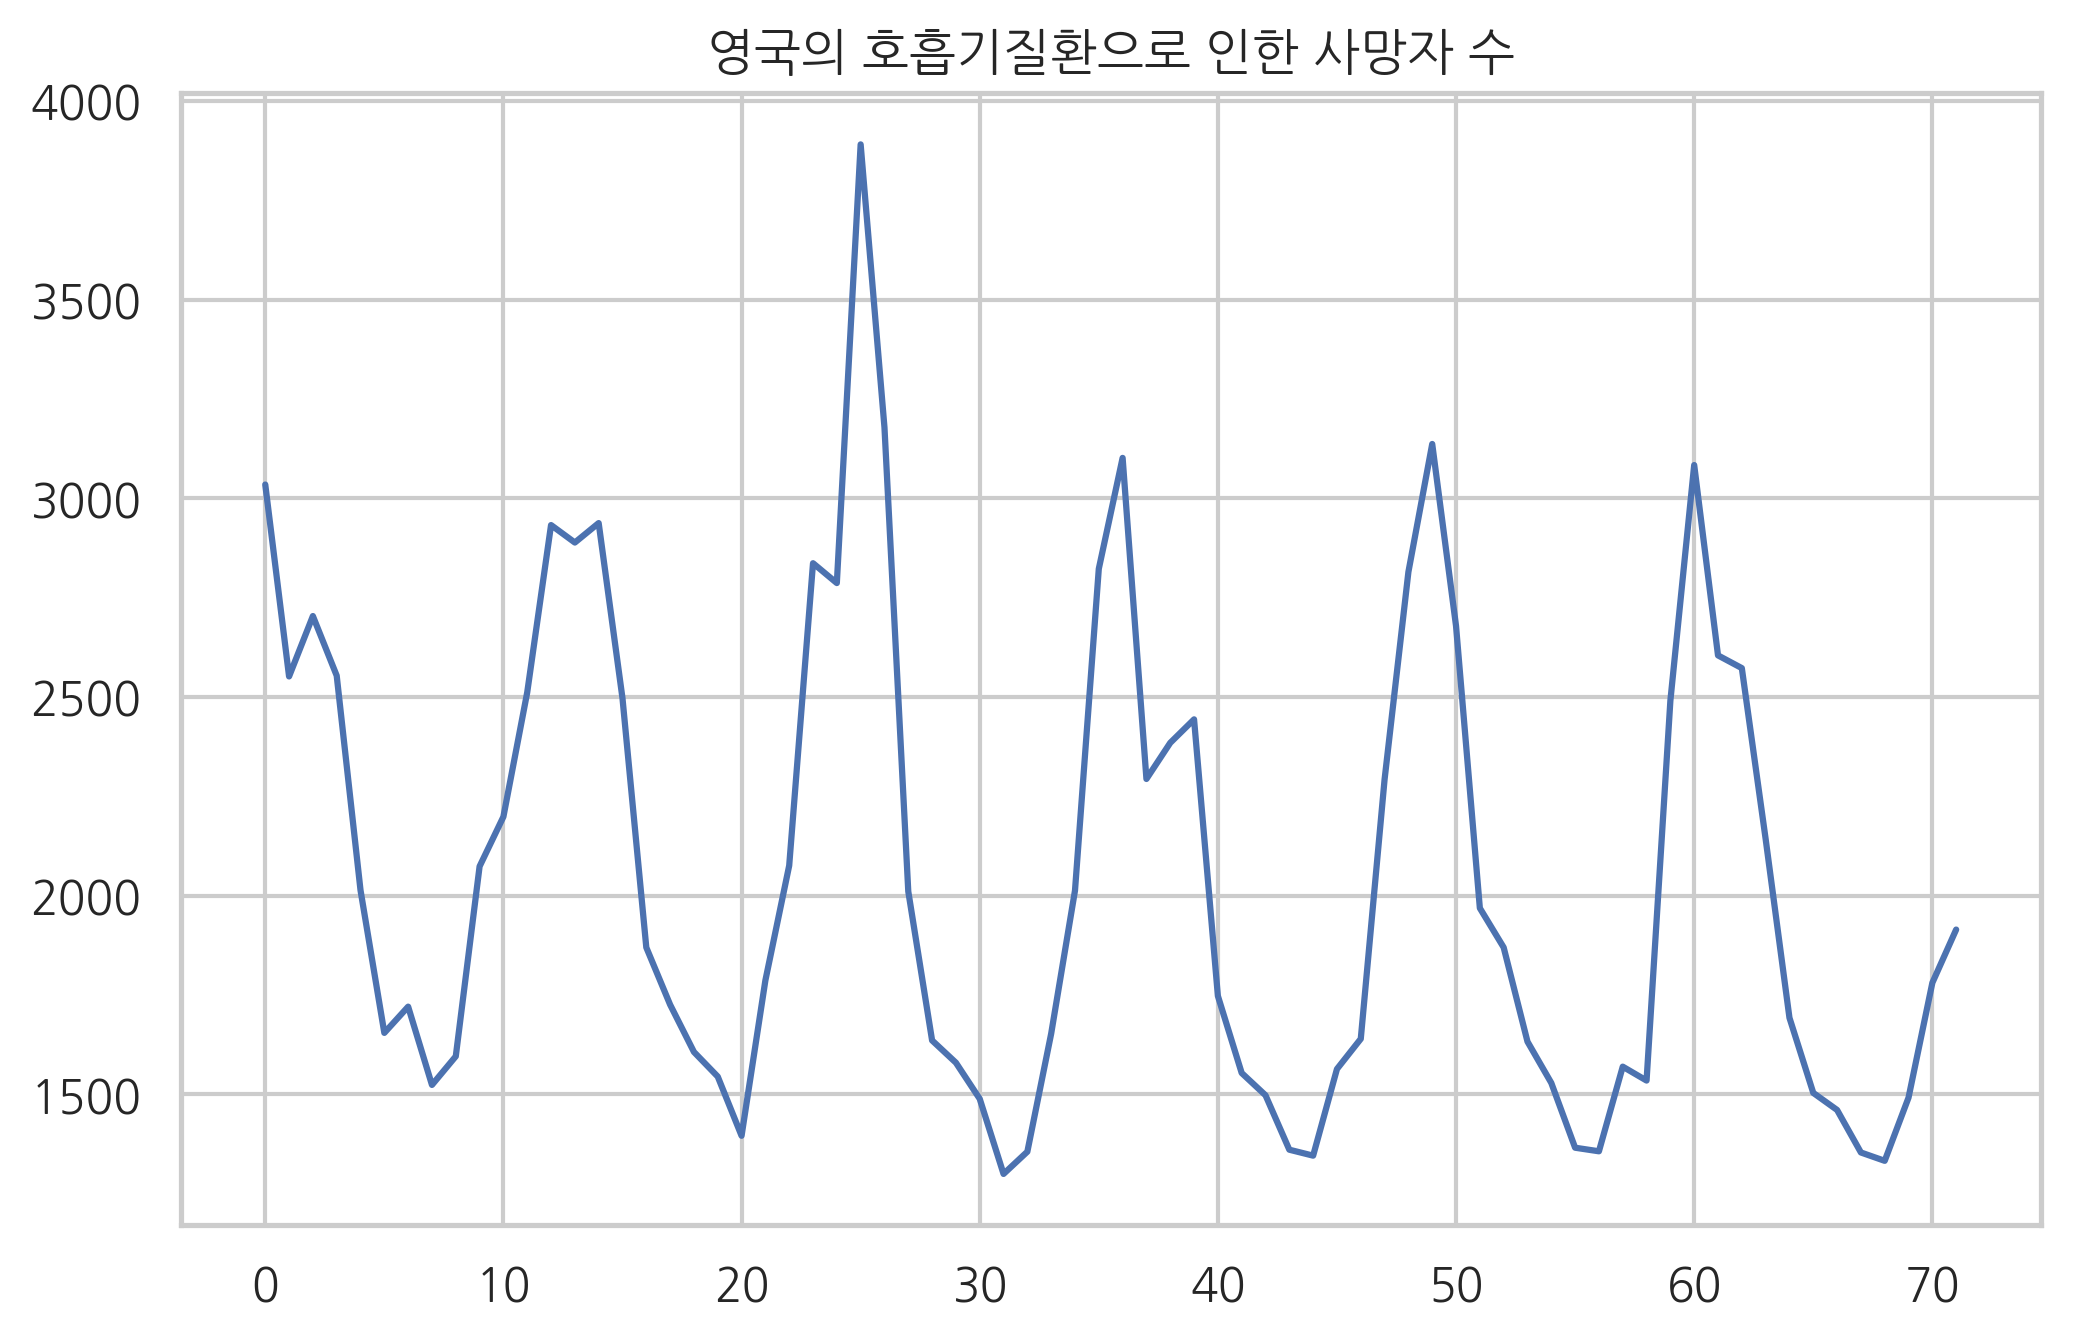

In [2]:
# df.value = df.value.map(lambda x : (x - df.value.mean()) / np.std(df.value))
df.value.plot()
plt.title("영국의 호흡기질환으로 인한 사망자 수")
plt.show()

원 데이터는 방금 그래프와 같지만 모형간의 비교를 위해 데이터를 조작한다. 원데이터에서 2000 이상의 값들을 모두 2000으로 설정했다. 

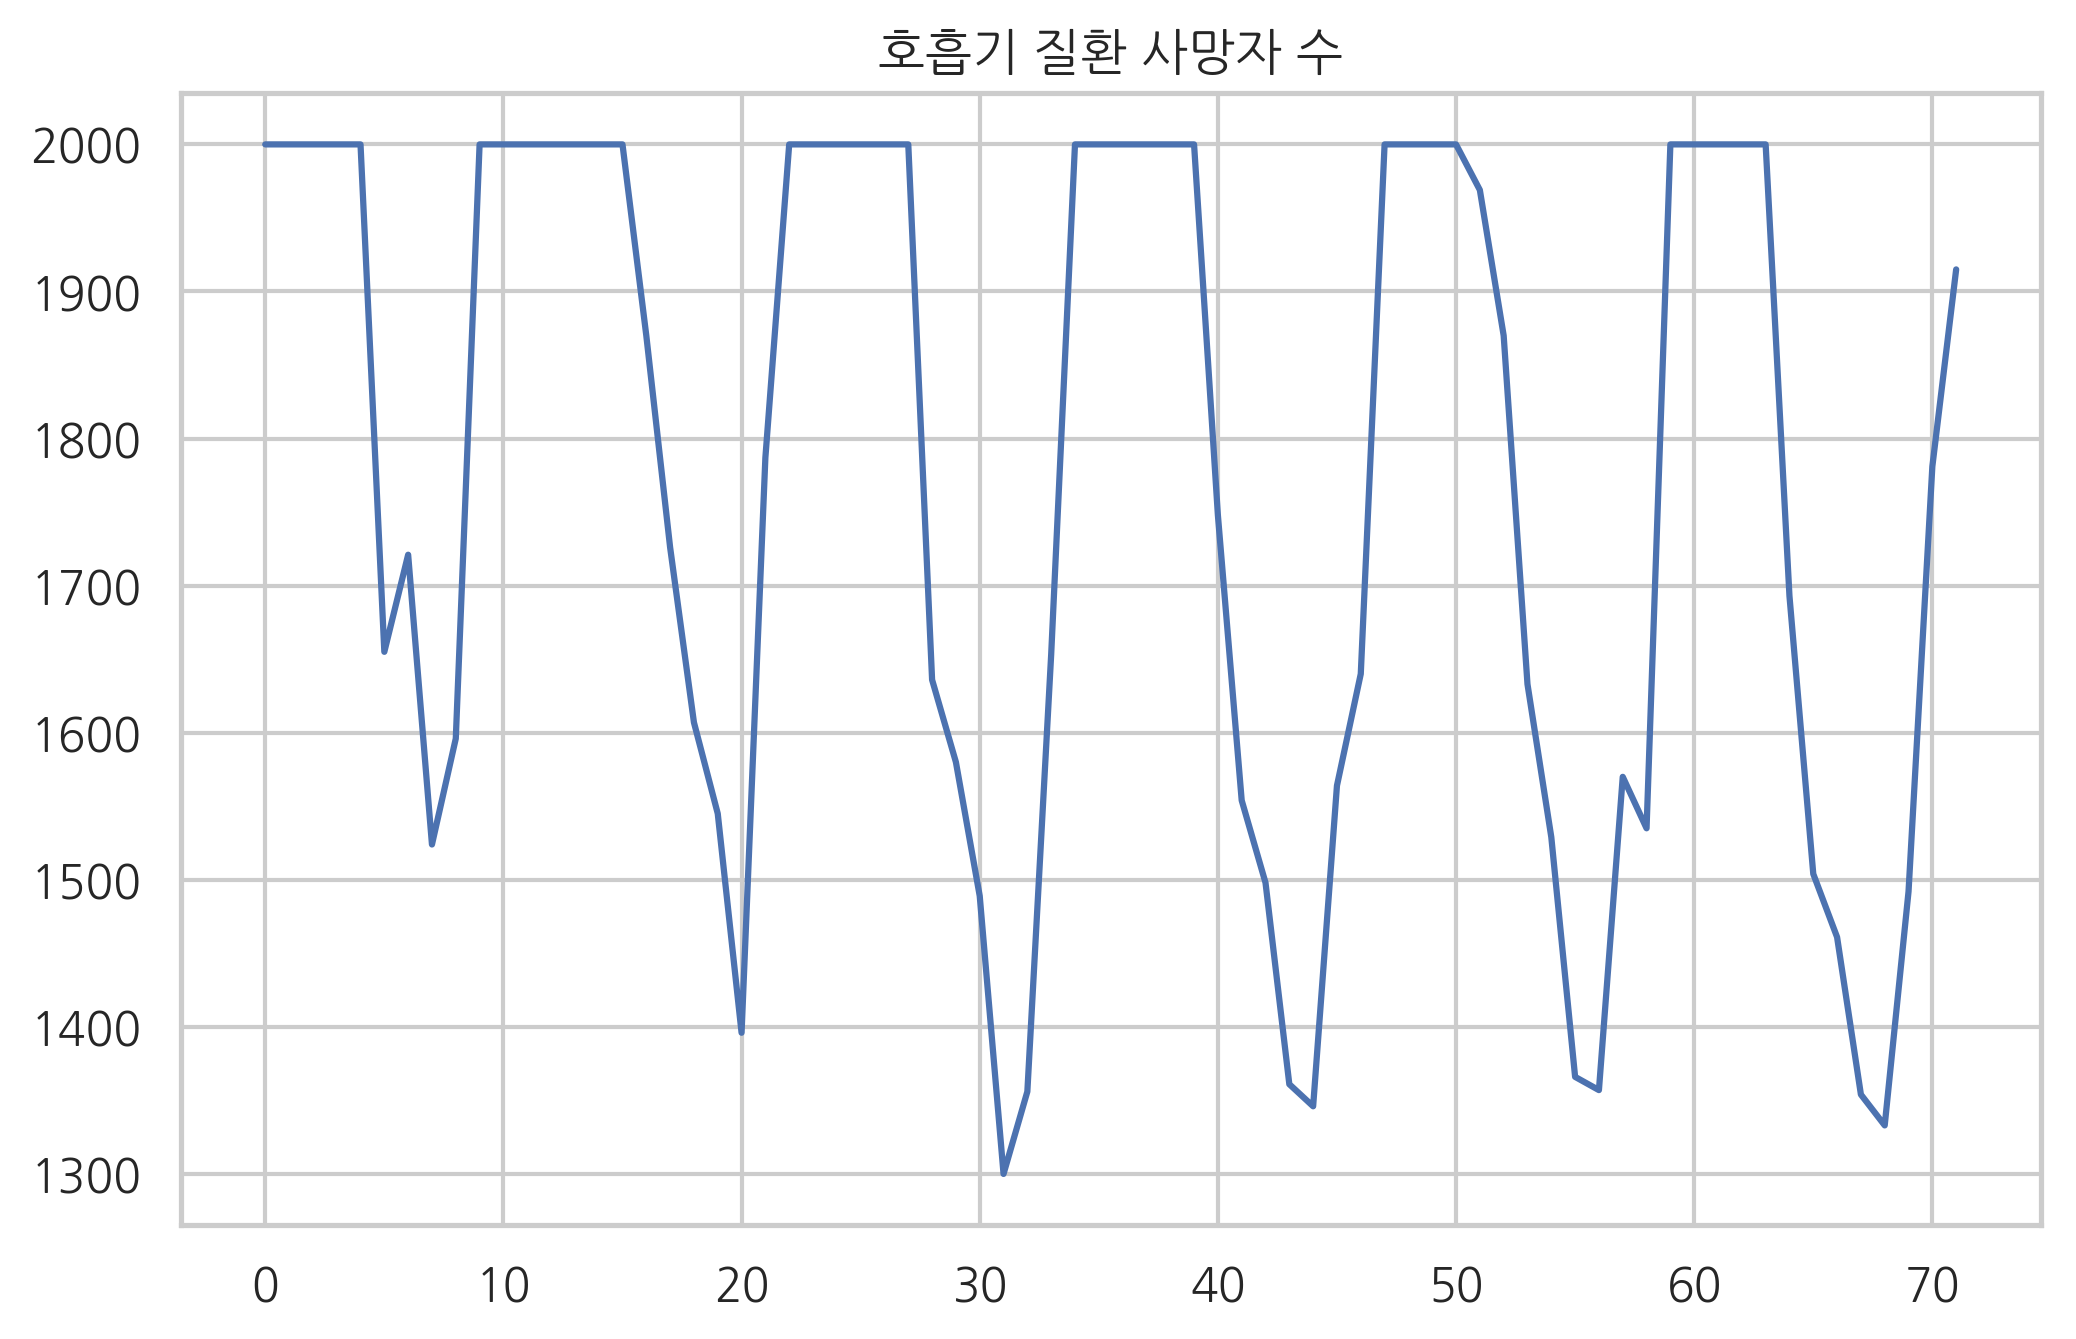

In [3]:
df["cliped_value"] = df.value.clip_upper(2000)
df.cliped_value.plot()
plt.title("호흡기 질환 사망자 수")
plt.show()

이 데이터를 이용해 ARMA 모형 만든다. $p=1, q=2$

In [4]:
model_ARMA = sm.tsa.ARMA(df["cliped_value"], (1,2))
result_ARMA = model_ARMA.fit()
print(result_ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:           cliped_value   No. Observations:                   72
Model:                     ARMA(1, 2)   Log Likelihood                -460.457
Method:                       css-mle   S.D. of innovations            143.769
Date:                Thu, 31 Jan 2019   AIC                            930.915
Time:                        11:28:11   BIC                            942.298
Sample:                             0   HQIC                           935.447
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1782.0398     64.334     27.700      0.000    1655.947    1908.133
ar.L1.cliped_value     0.5829      0.130      4.496      0.000       0.329       0.837
ma.L1.cliped_value  

이 모형으로 예측한 시계열과 실제 시계열을 비교한다. 

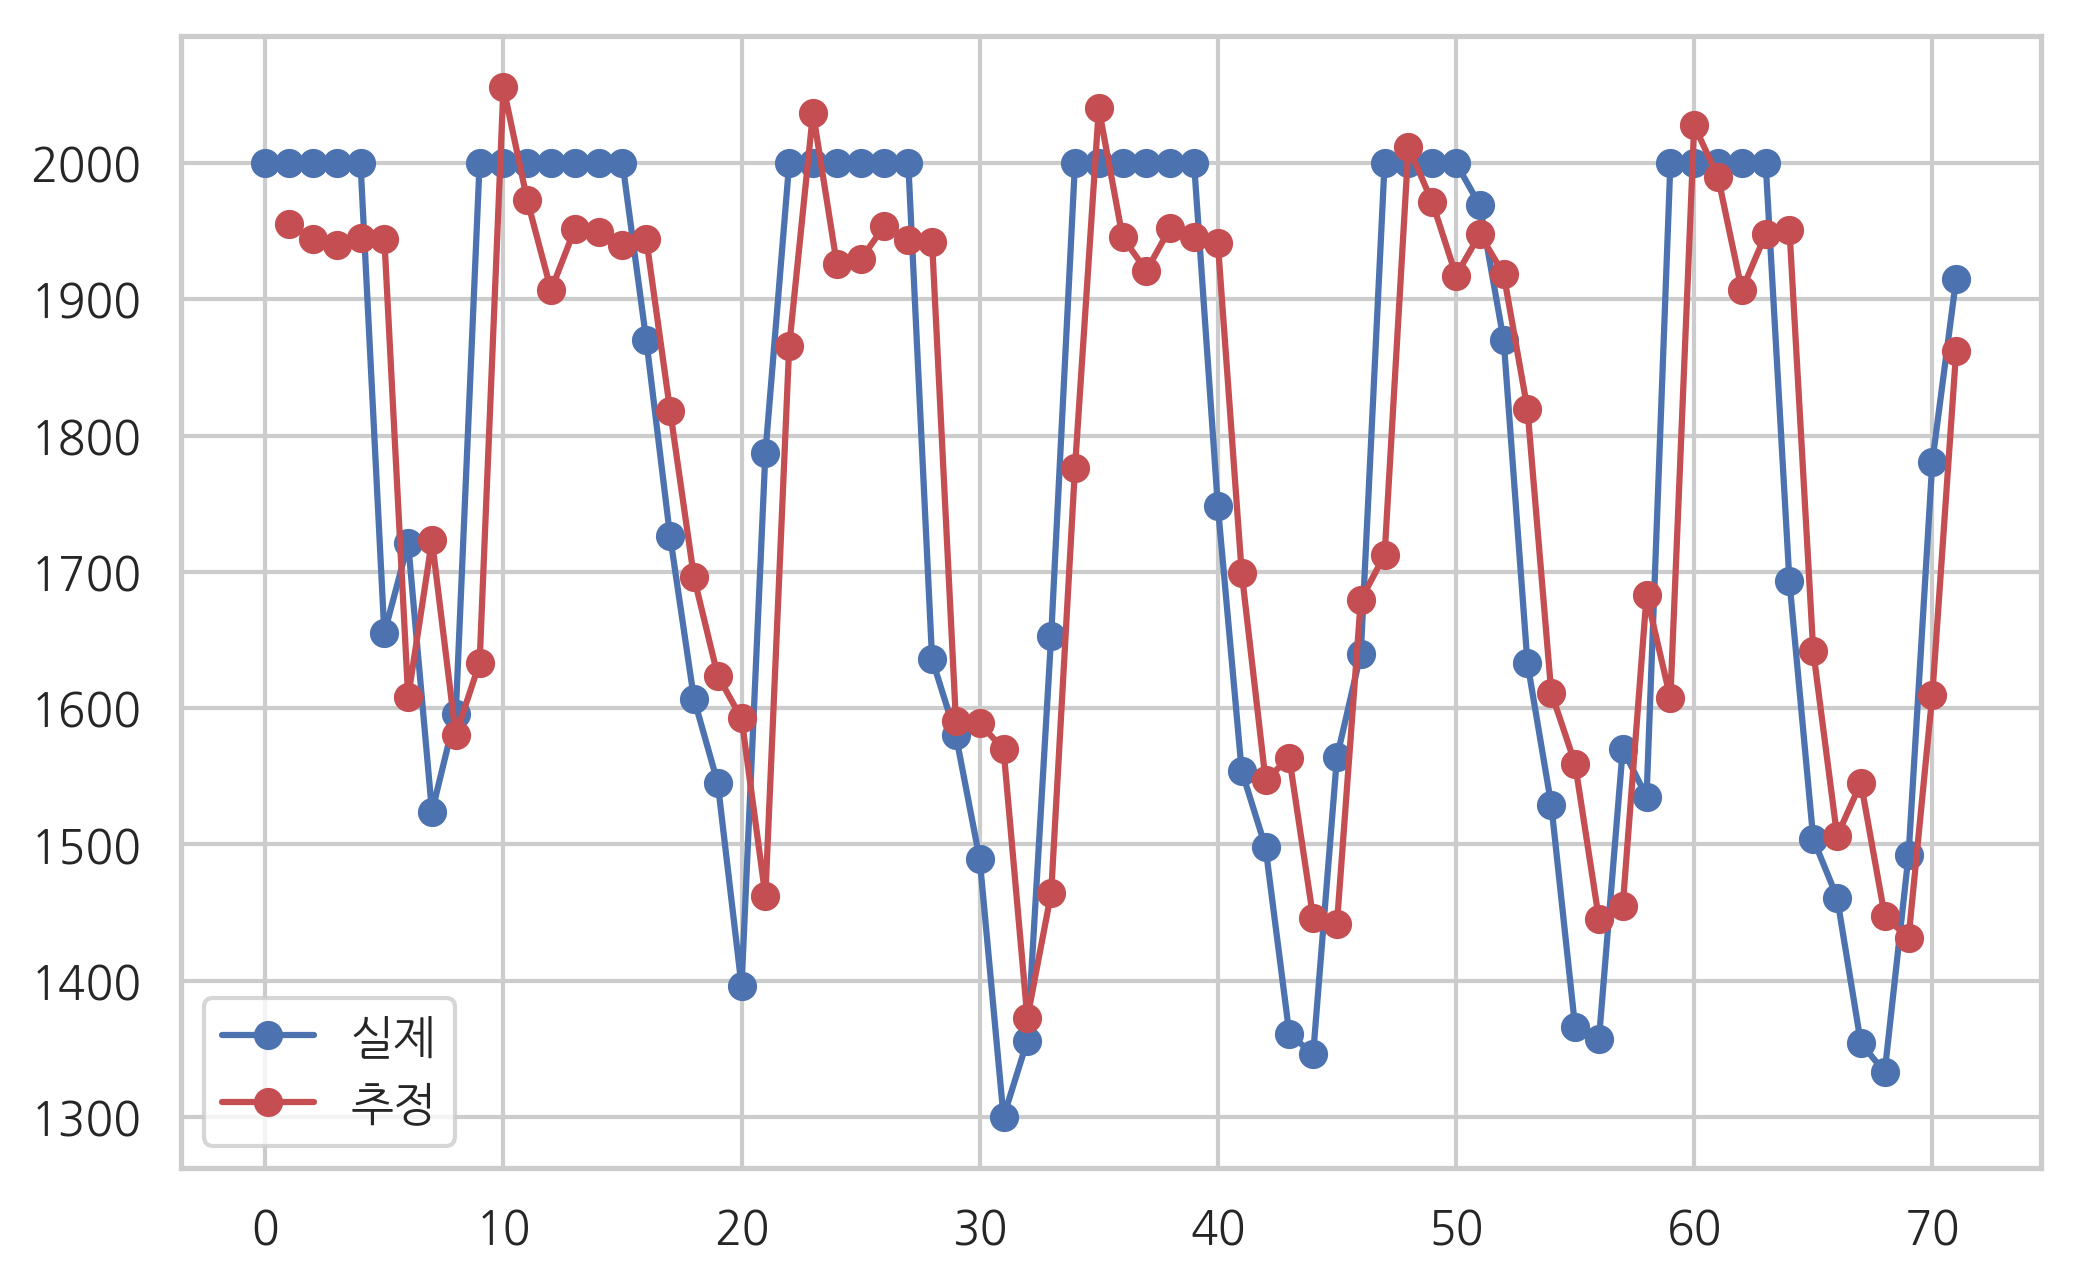

In [5]:
plt.plot(df["cliped_value"], "bo-", label="실제")
plt.plot(result_ARMA.predict(1), "ro-", label="추정")
plt.legend()
plt.show()

이번에는 RNN을 이용하여 시계열을 풀어본다. 이 때 타입스텝은 7로 하였다. 신경망에서는 평균과 분산으로 정규화한 값을 데이터로 사용한다. 

In [6]:
# 타임스텝
ts = 7

df["cliped_std_value"] = df.cliped_value.map(lambda x : (x - df.cliped_value.mean()) / np.std(df.cliped_value))
X_train = np.asarray([np.array([df.cliped_std_value.values[i+j] for j in range(ts)])
                      for i in range(len(df.cliped_std_value) - ts)]).reshape(-1,ts,1)
y_train = df.cliped_std_value.values[ts:]
X_train.shape, y_train.shape

((65, 7, 1), (65,))

In [7]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model_RNN = Sequential()
model_RNN.add(SimpleRNN(100, input_shape=(ts, 1)))
model_RNN.add(Dense(1, activation="linear"))
model_RNN.compile(loss='mse', optimizer='adam')

Using TensorFlow backend.


In [8]:
model_RNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


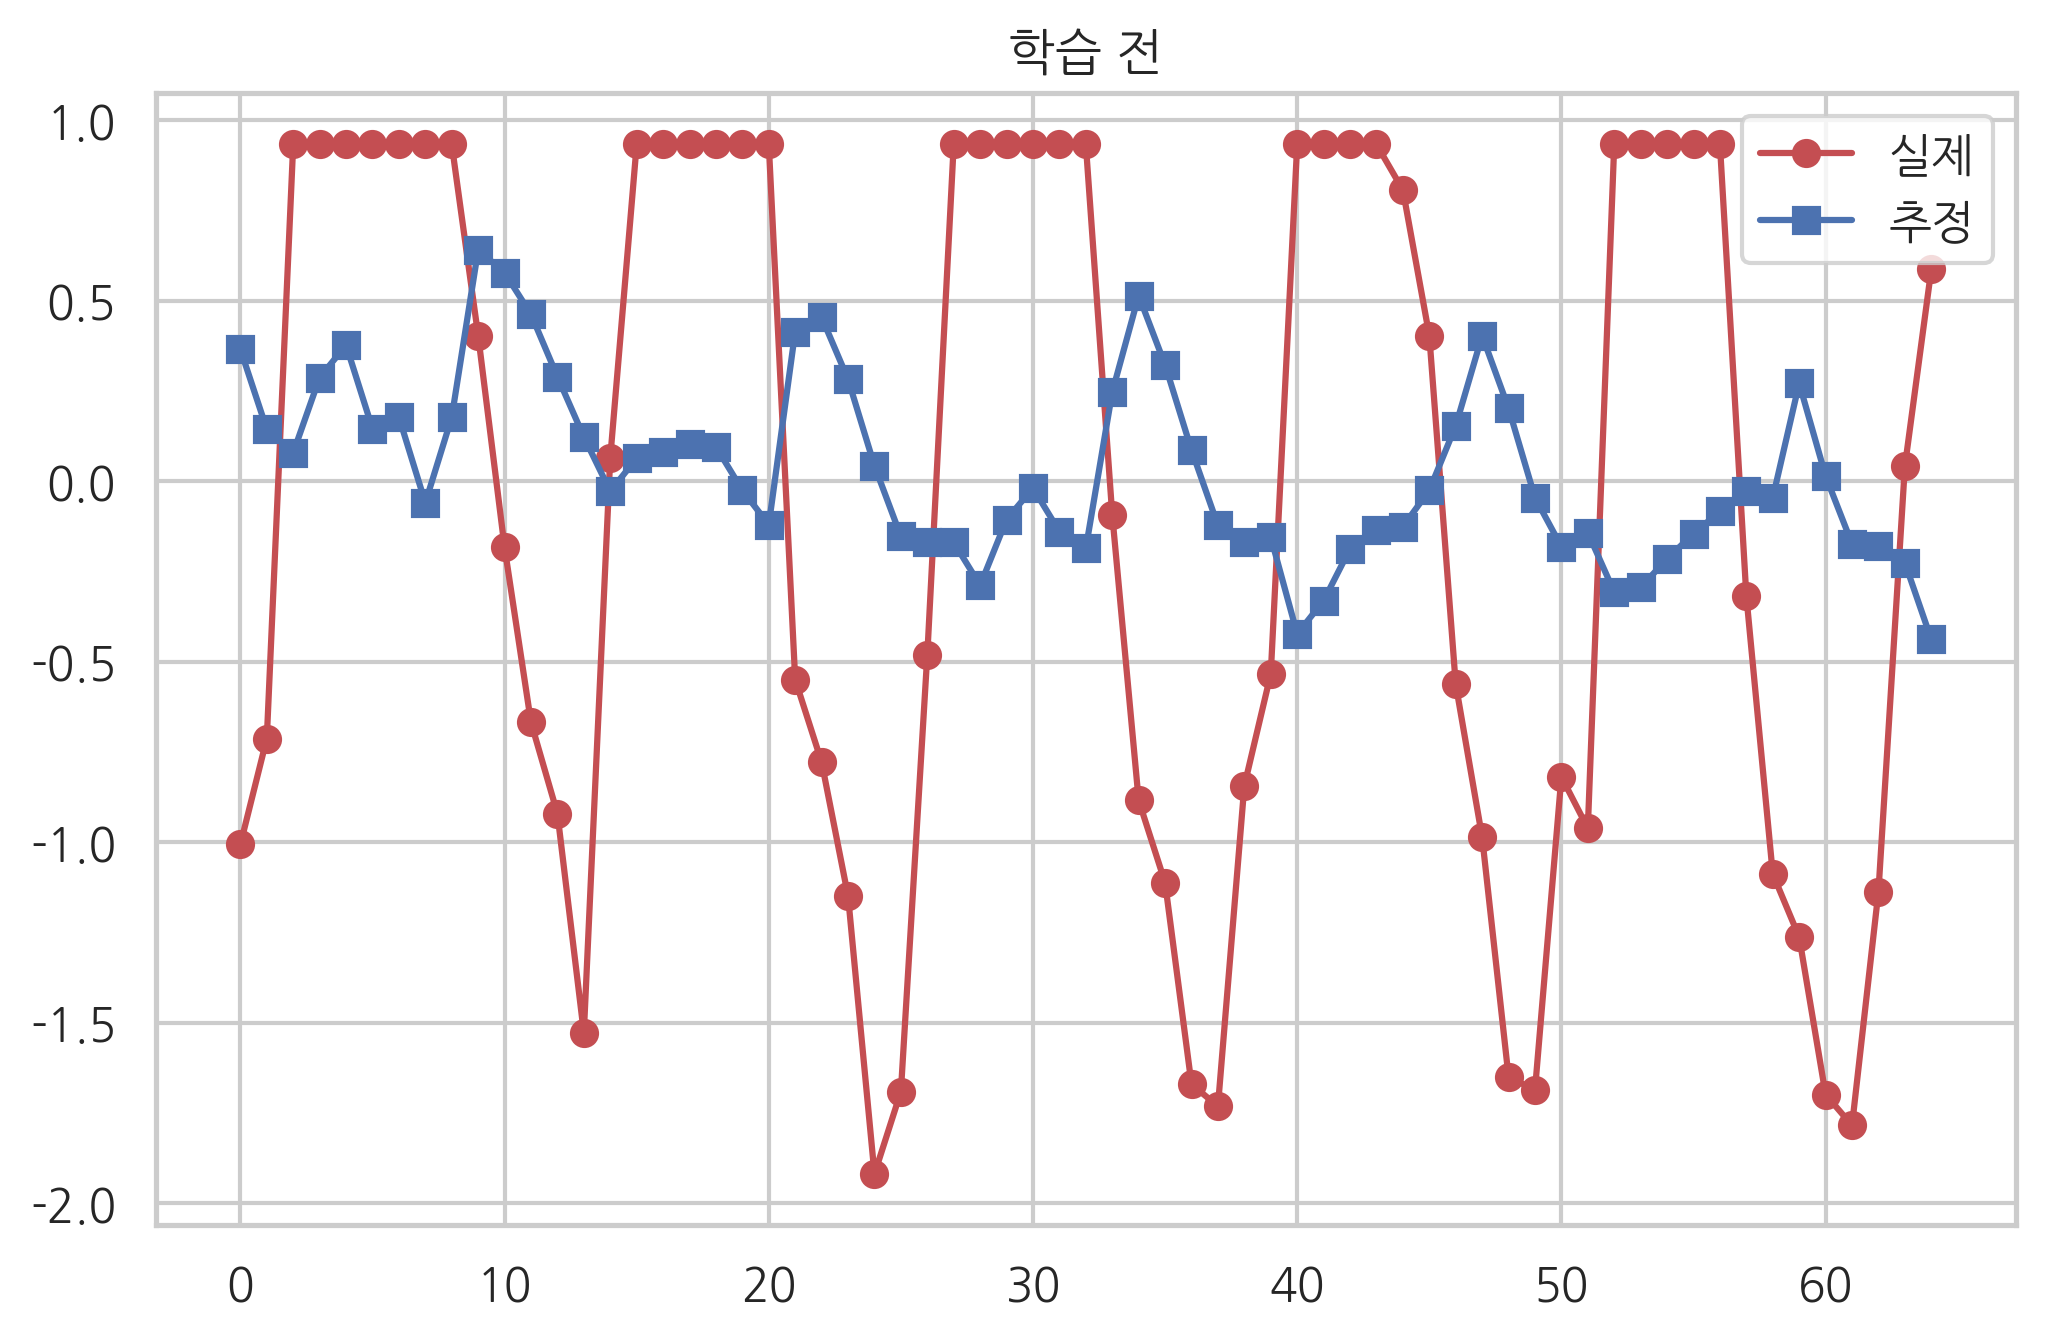

In [9]:
plt.plot(y_train[:], 'ro-', label="실제")
plt.plot(model_RNN.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title("학습 전")
plt.show()

In [10]:
history_RNN = model_RNN.fit(X_train, y_train, epochs=1000,verbose=0)

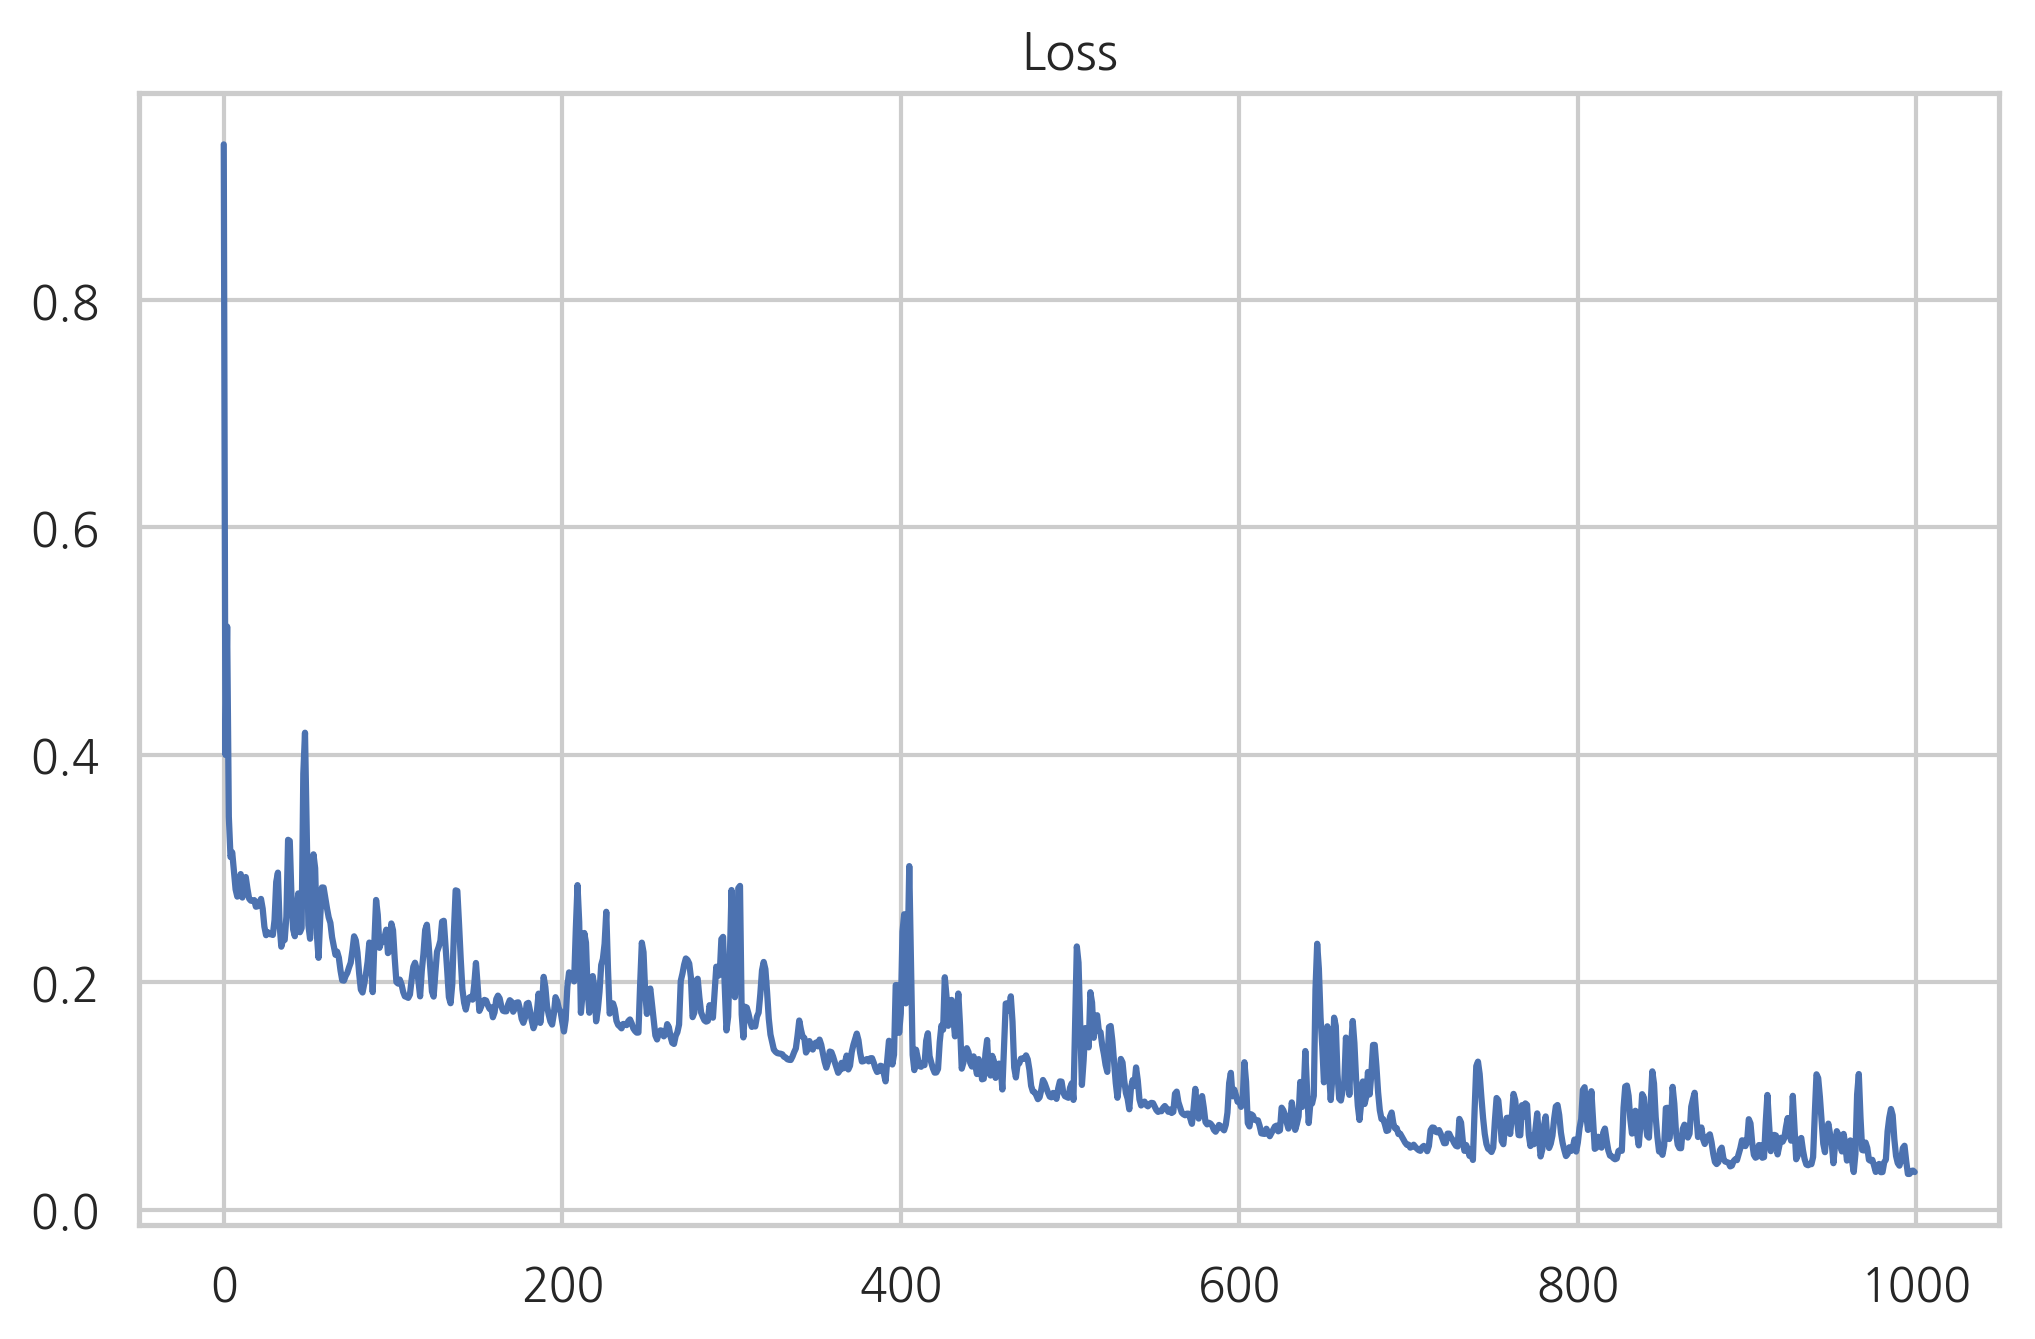

In [11]:
plt.plot(history_RNN.history["loss"])
plt.title("Loss")
plt.show()

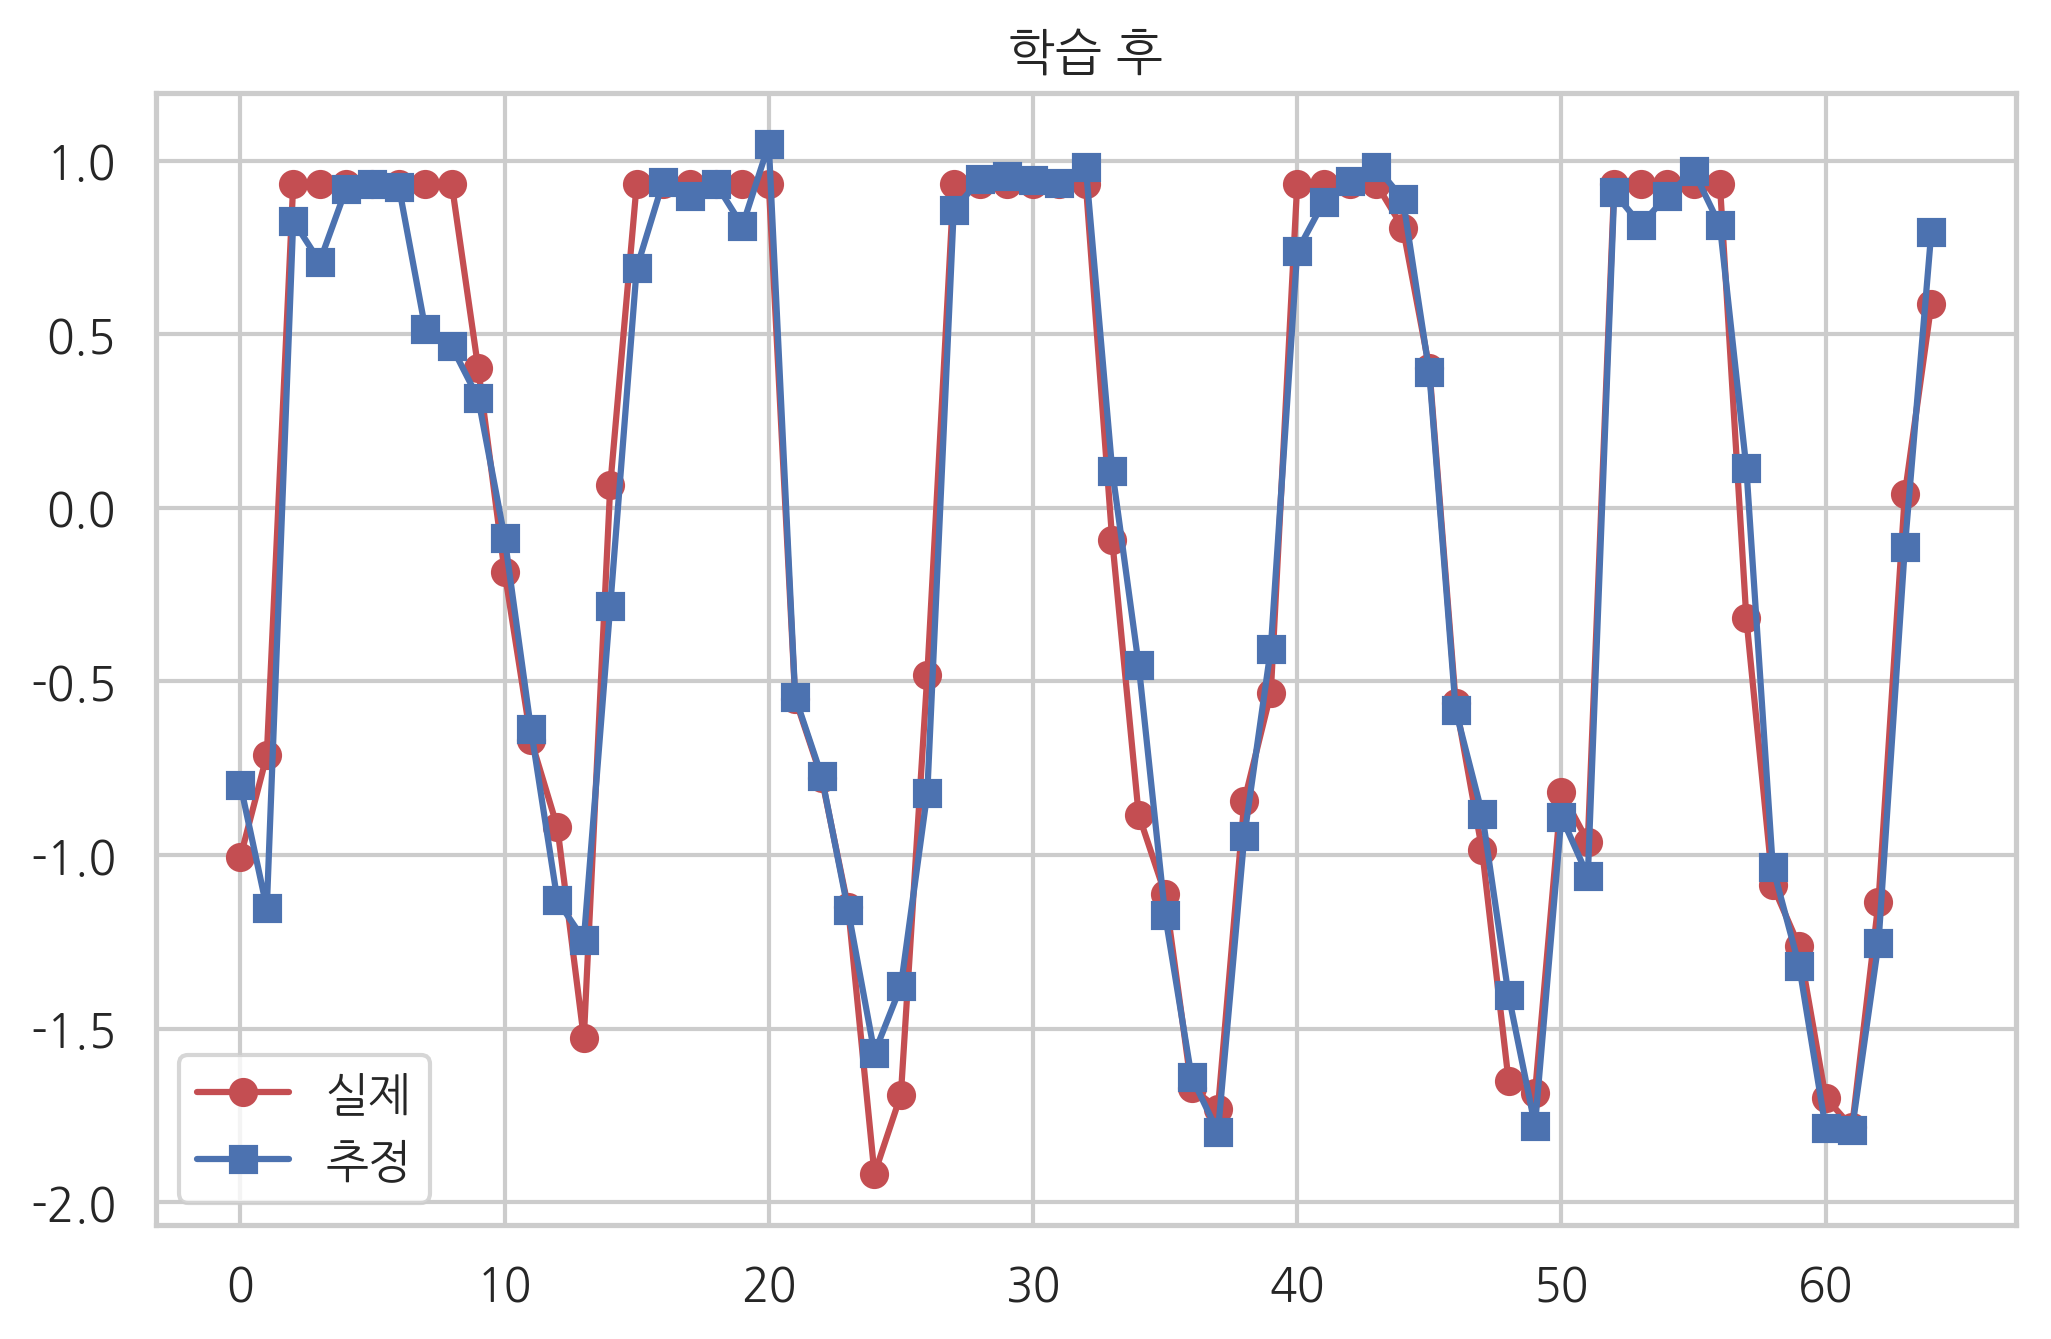

In [12]:
plt.plot(y_train[:], 'ro-', label="실제")
plt.plot(model_RNN.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title("학습 후")
plt.show()

같은 것을 LSTM을 이용해 모델링하면 다음과 같다.

In [13]:
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(ts, 1)))
model_LSTM.add(Dense(1, activation="linear"))
model_LSTM.compile(loss='mse', optimizer='adam')

In [14]:
model_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


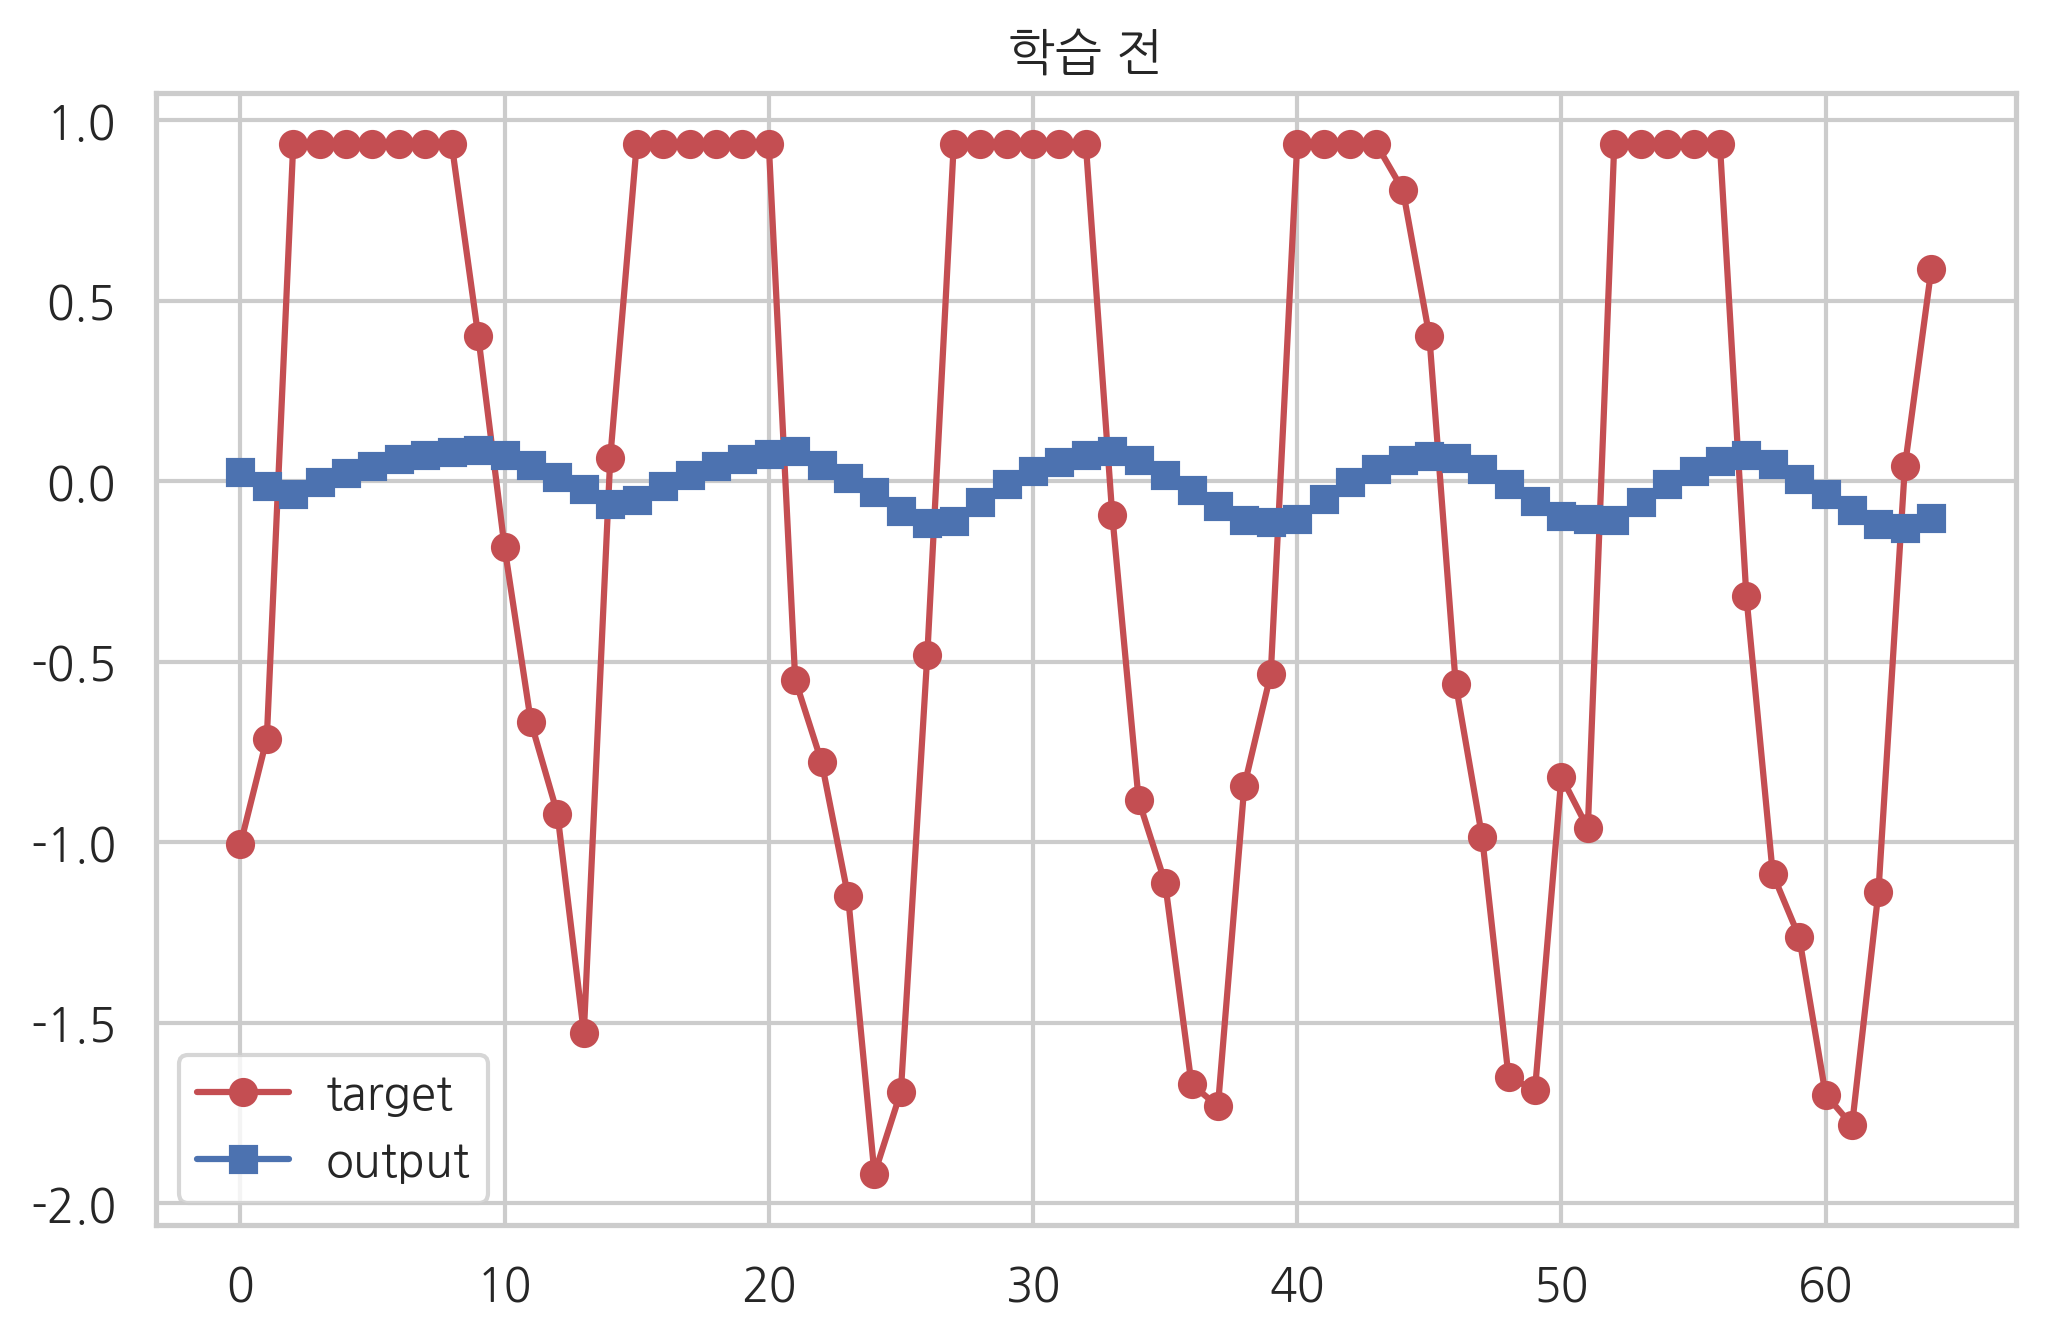

In [15]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 전")
plt.show()

In [16]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000,verbose=0)

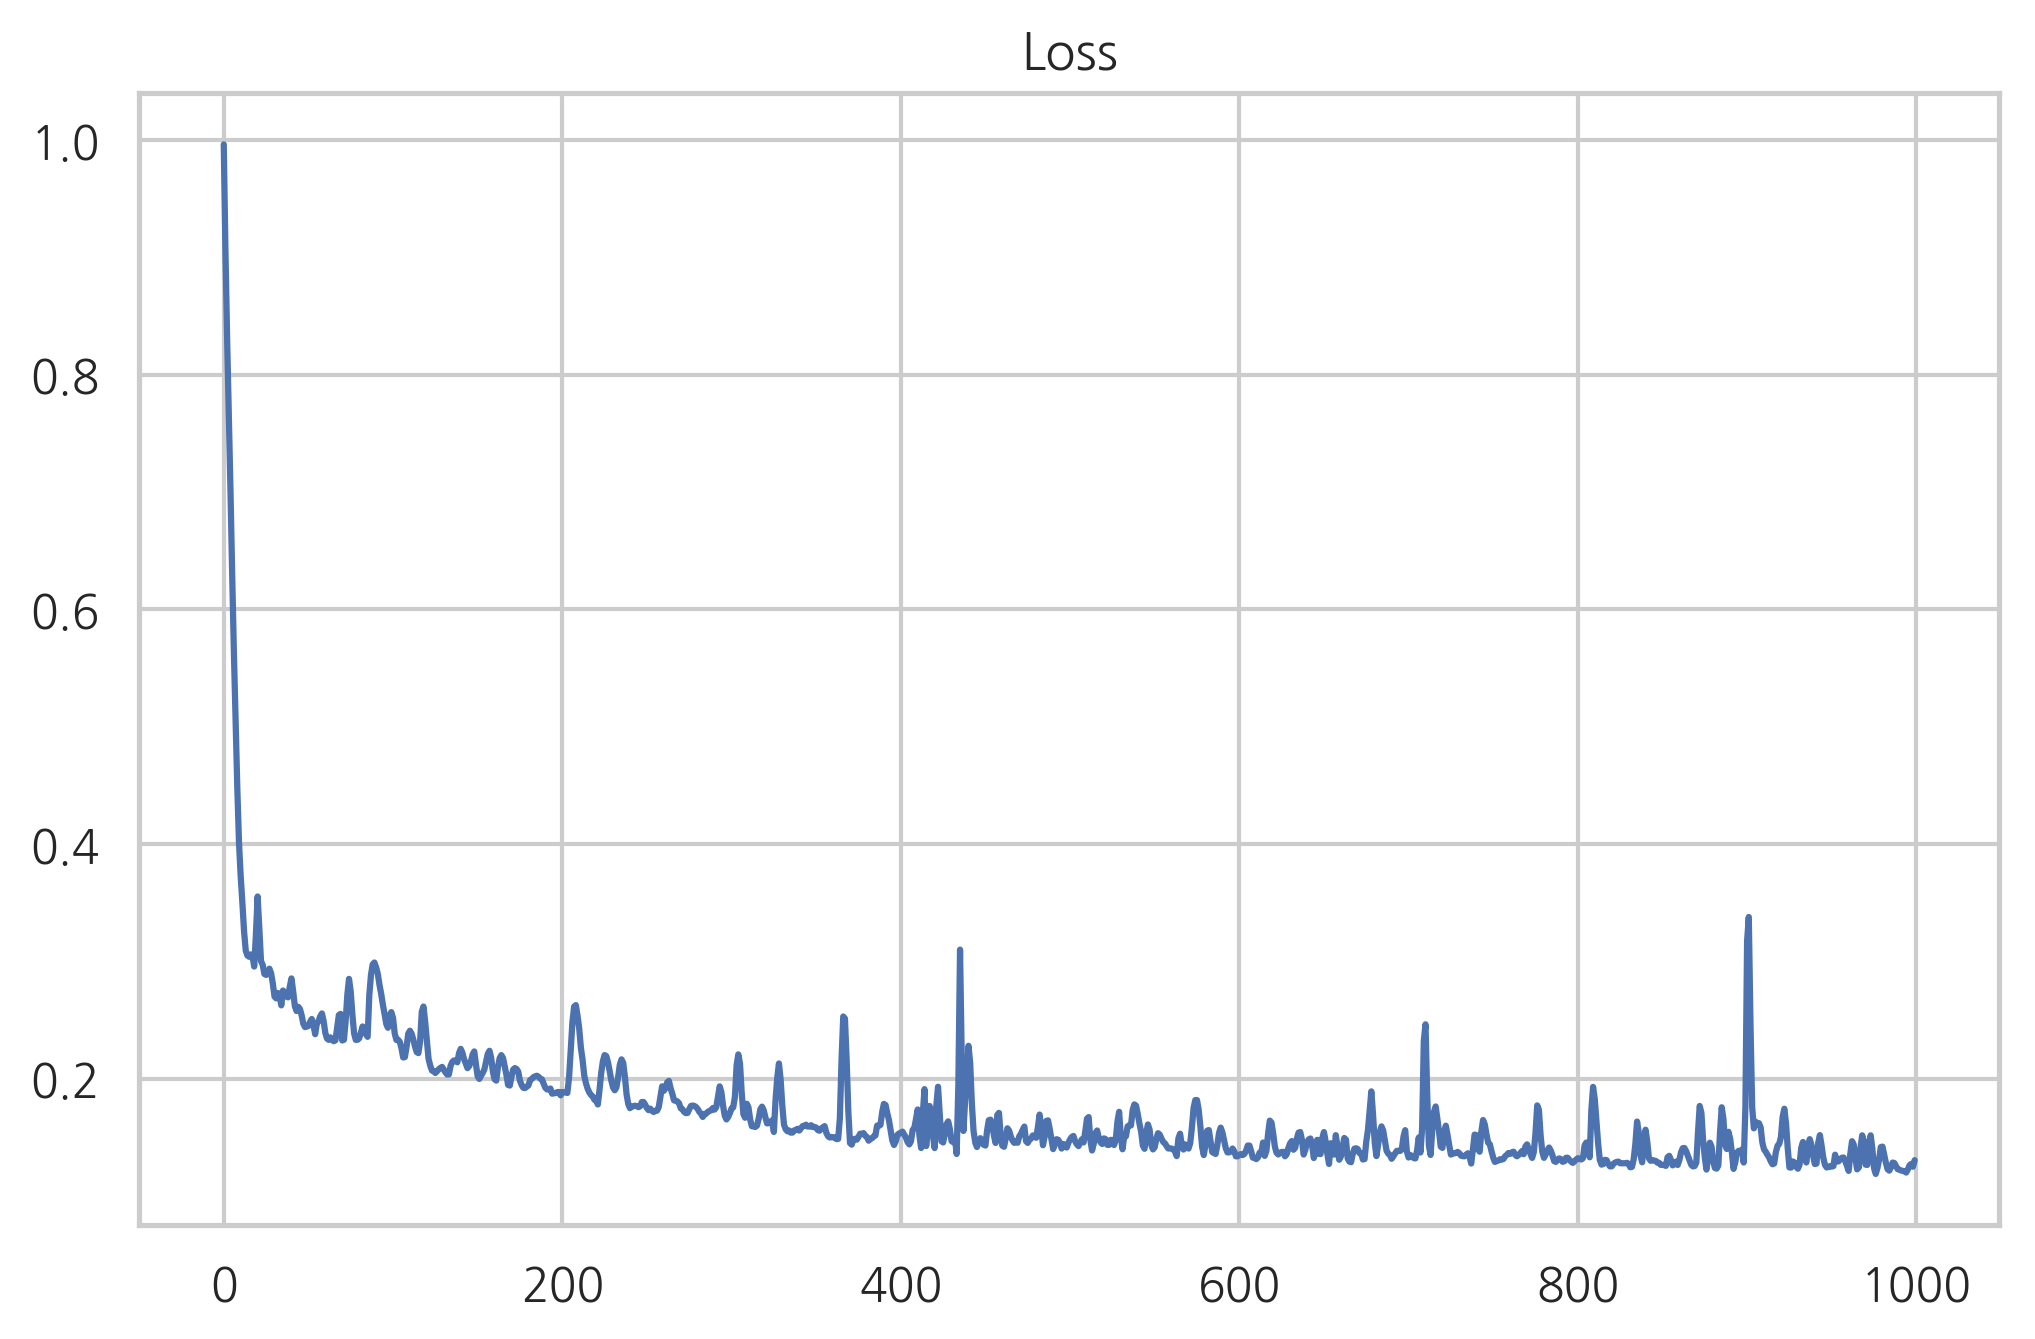

In [17]:
plt.plot(history_LSTM.history["loss"])
plt.title("Loss")
plt.show()

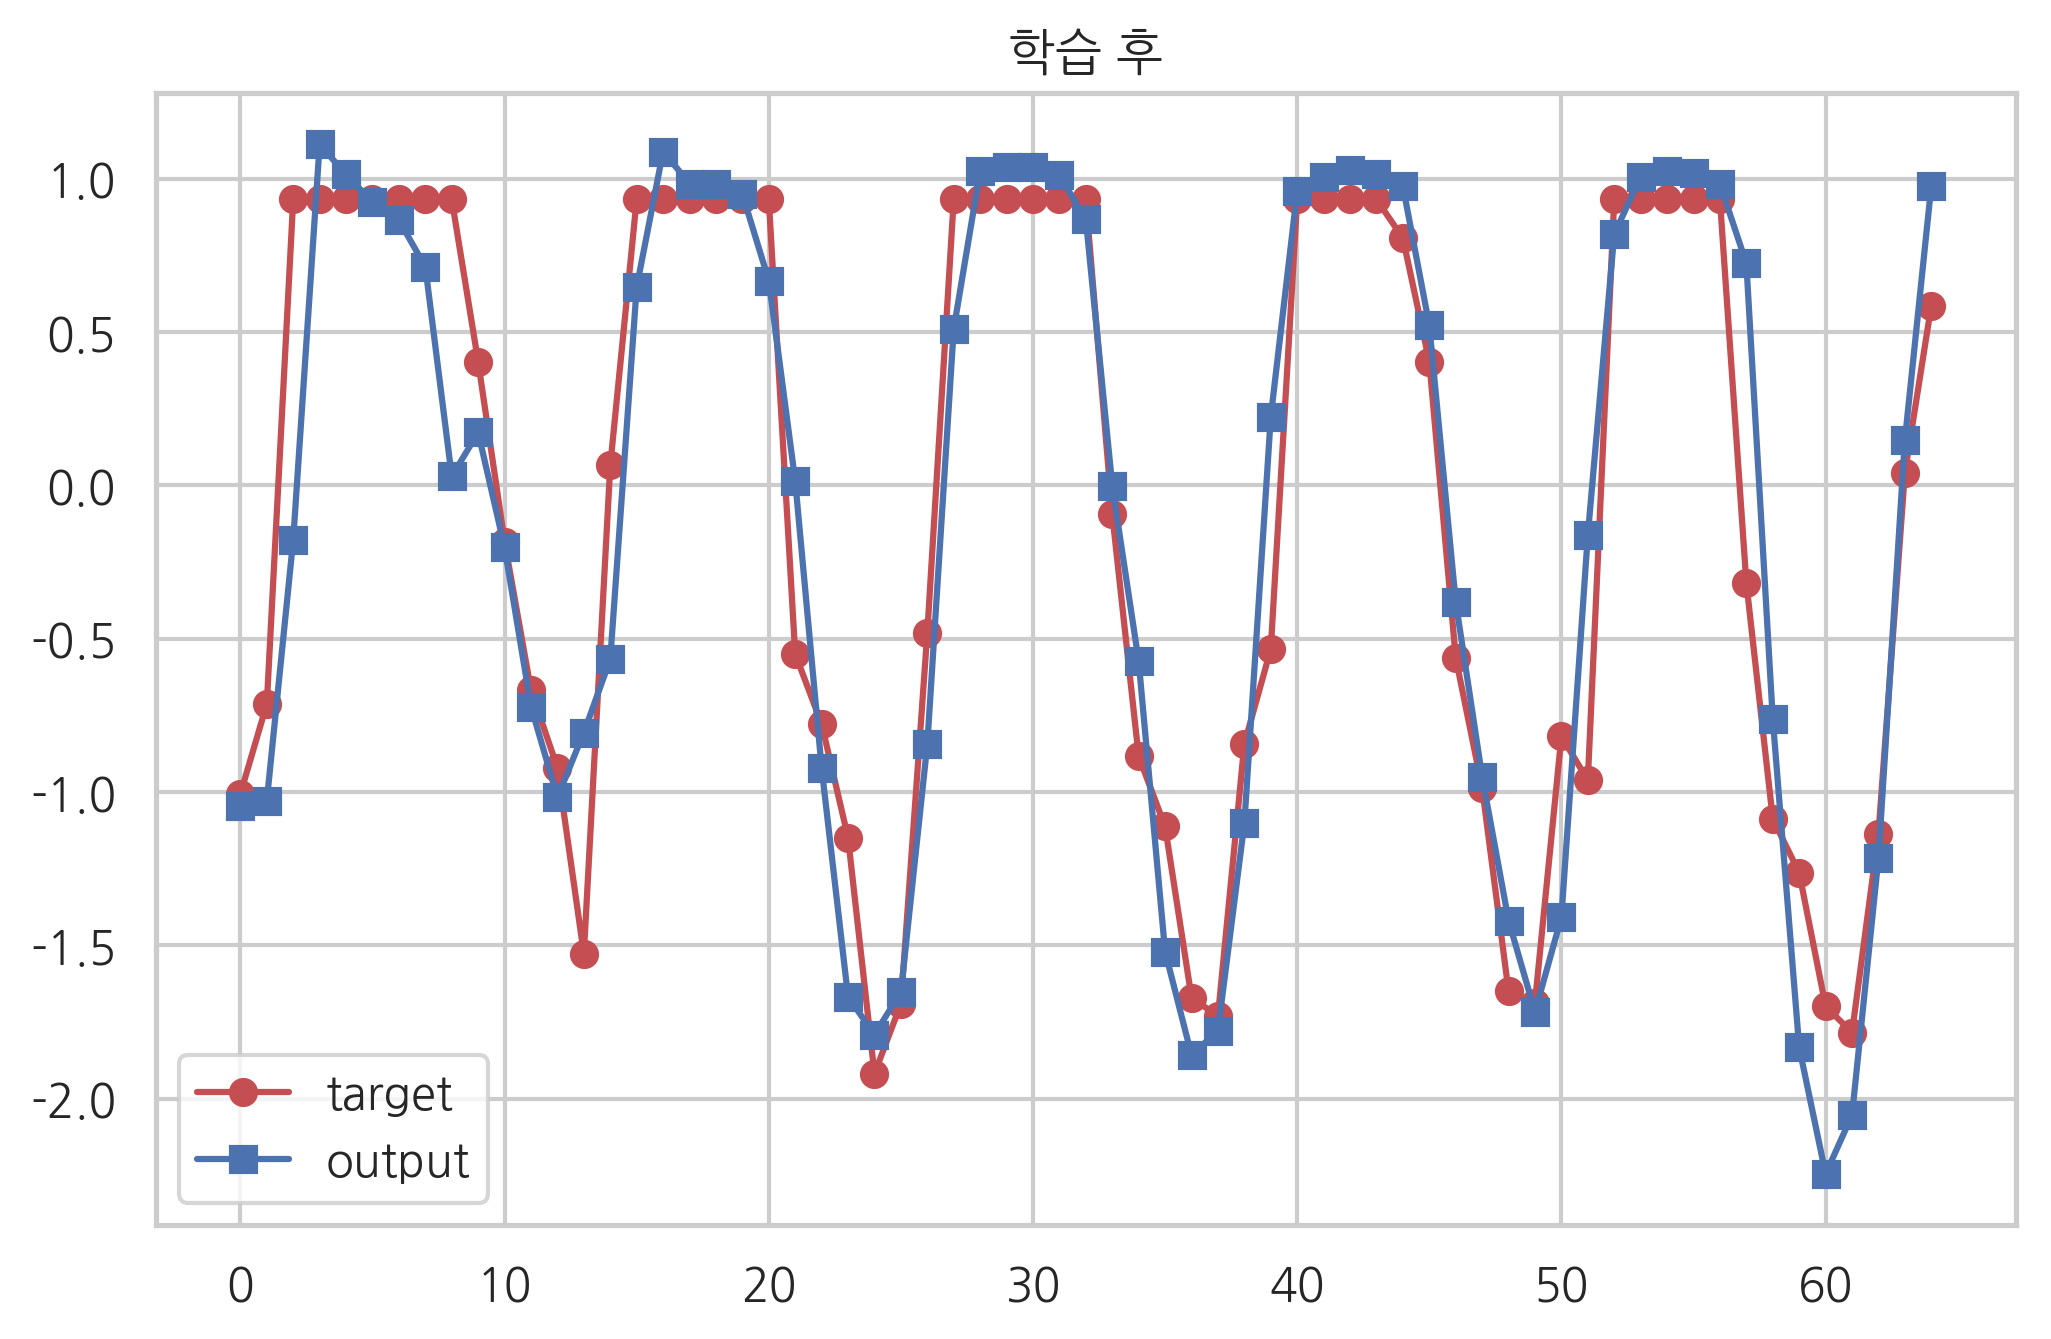

In [18]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 후")
plt.show()

지금까지 설명한 것은 기본적인 LSTM의 구조이다. 실제로는 LSTM을 변형한 것들도 많이 사용된다.

## Bi-directional LSTM

In [19]:
from keras.layers import Bidirectional

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [21]:
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(ts, 1))))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='RMSProp')

In [22]:
history = model.fit(X_train, y_train, epochs=1000,verbose=0)

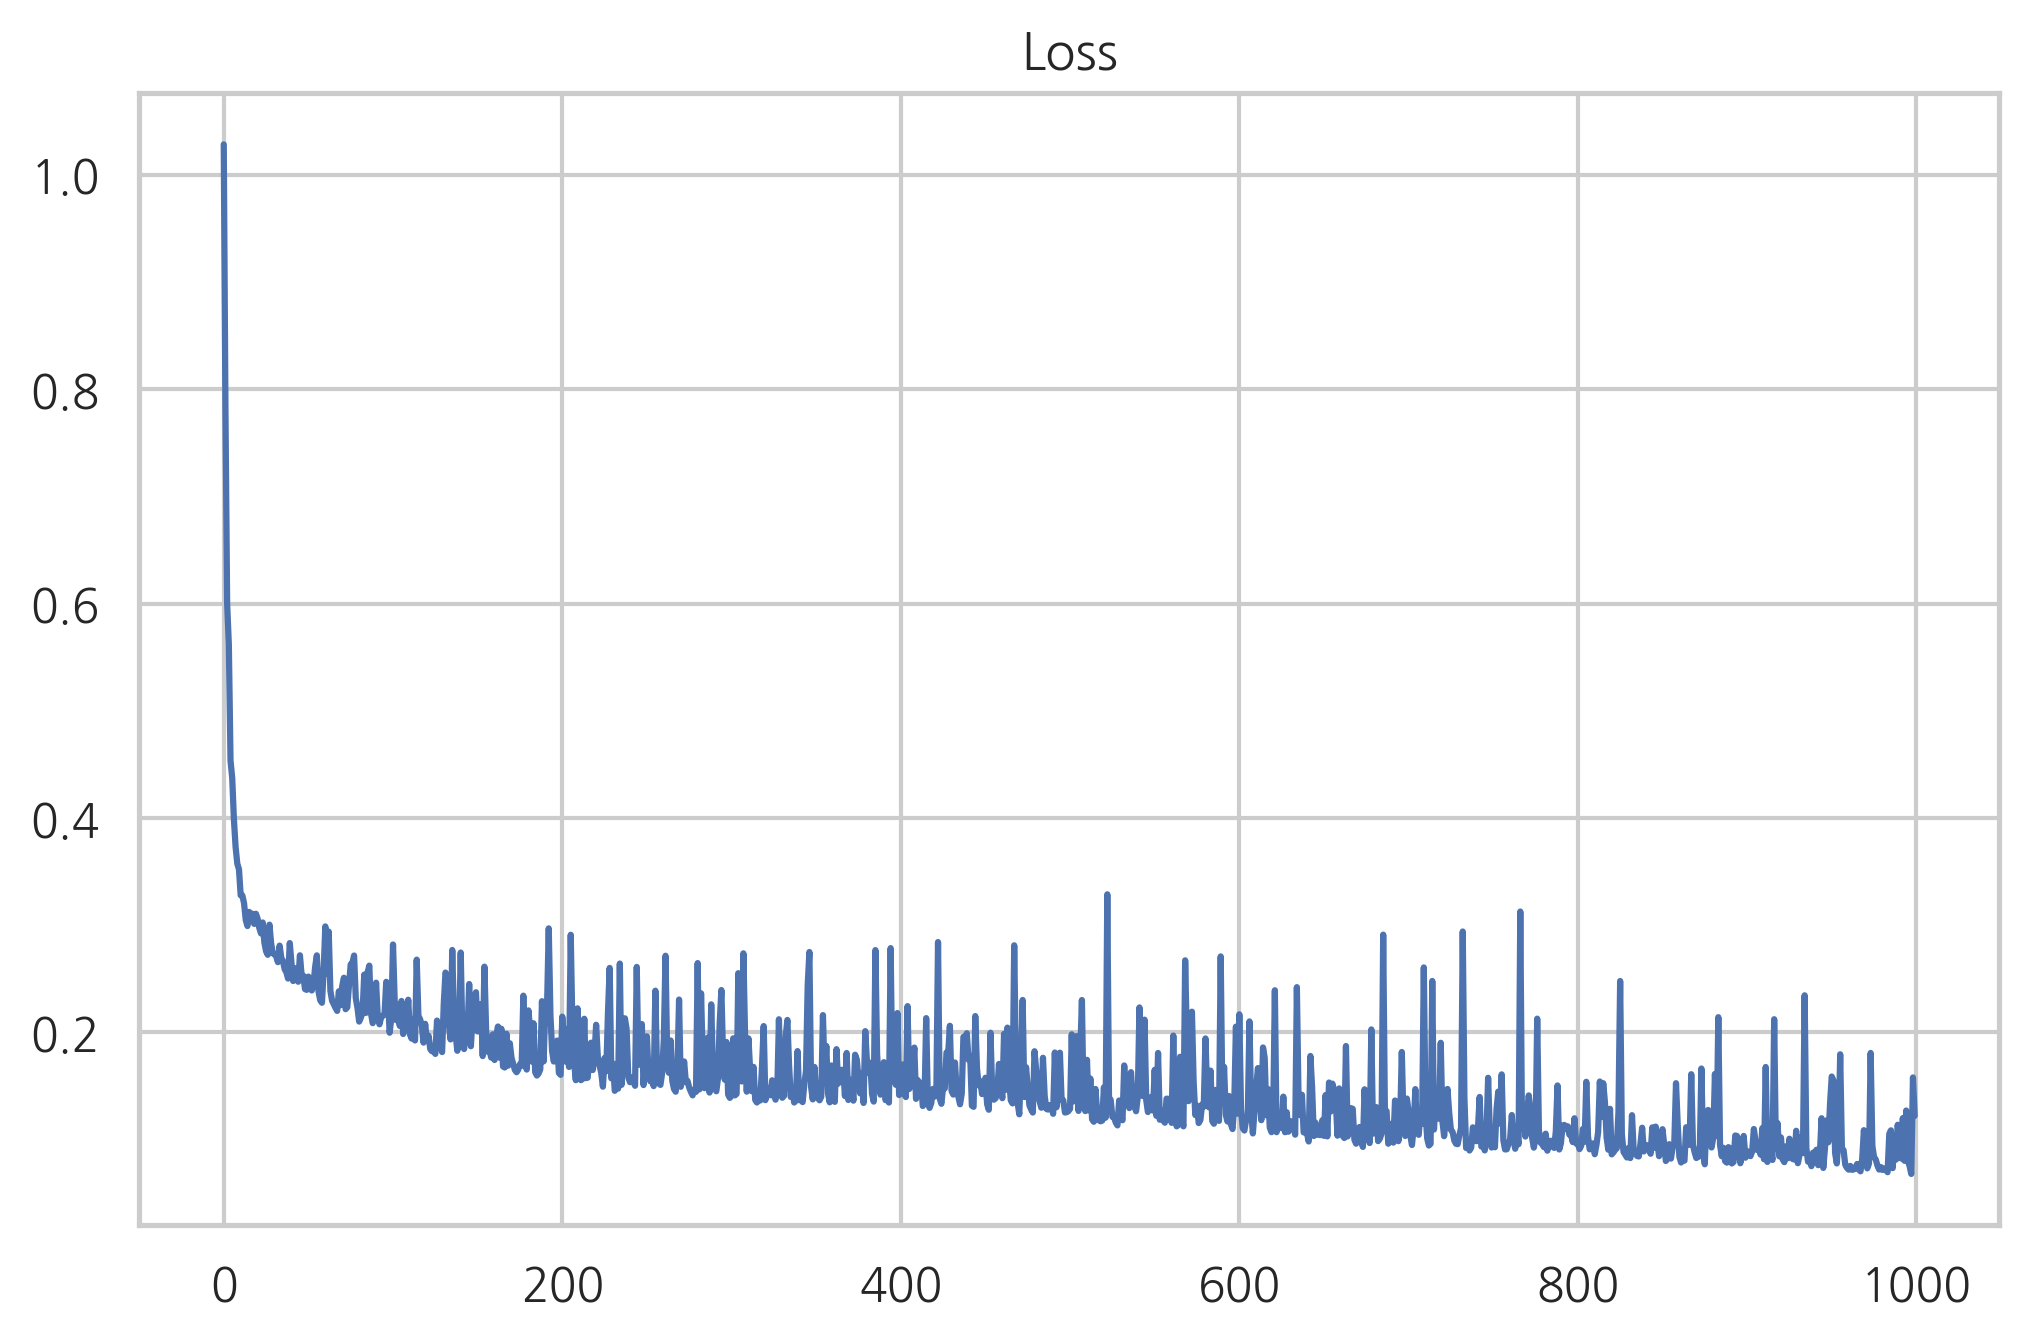

In [23]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

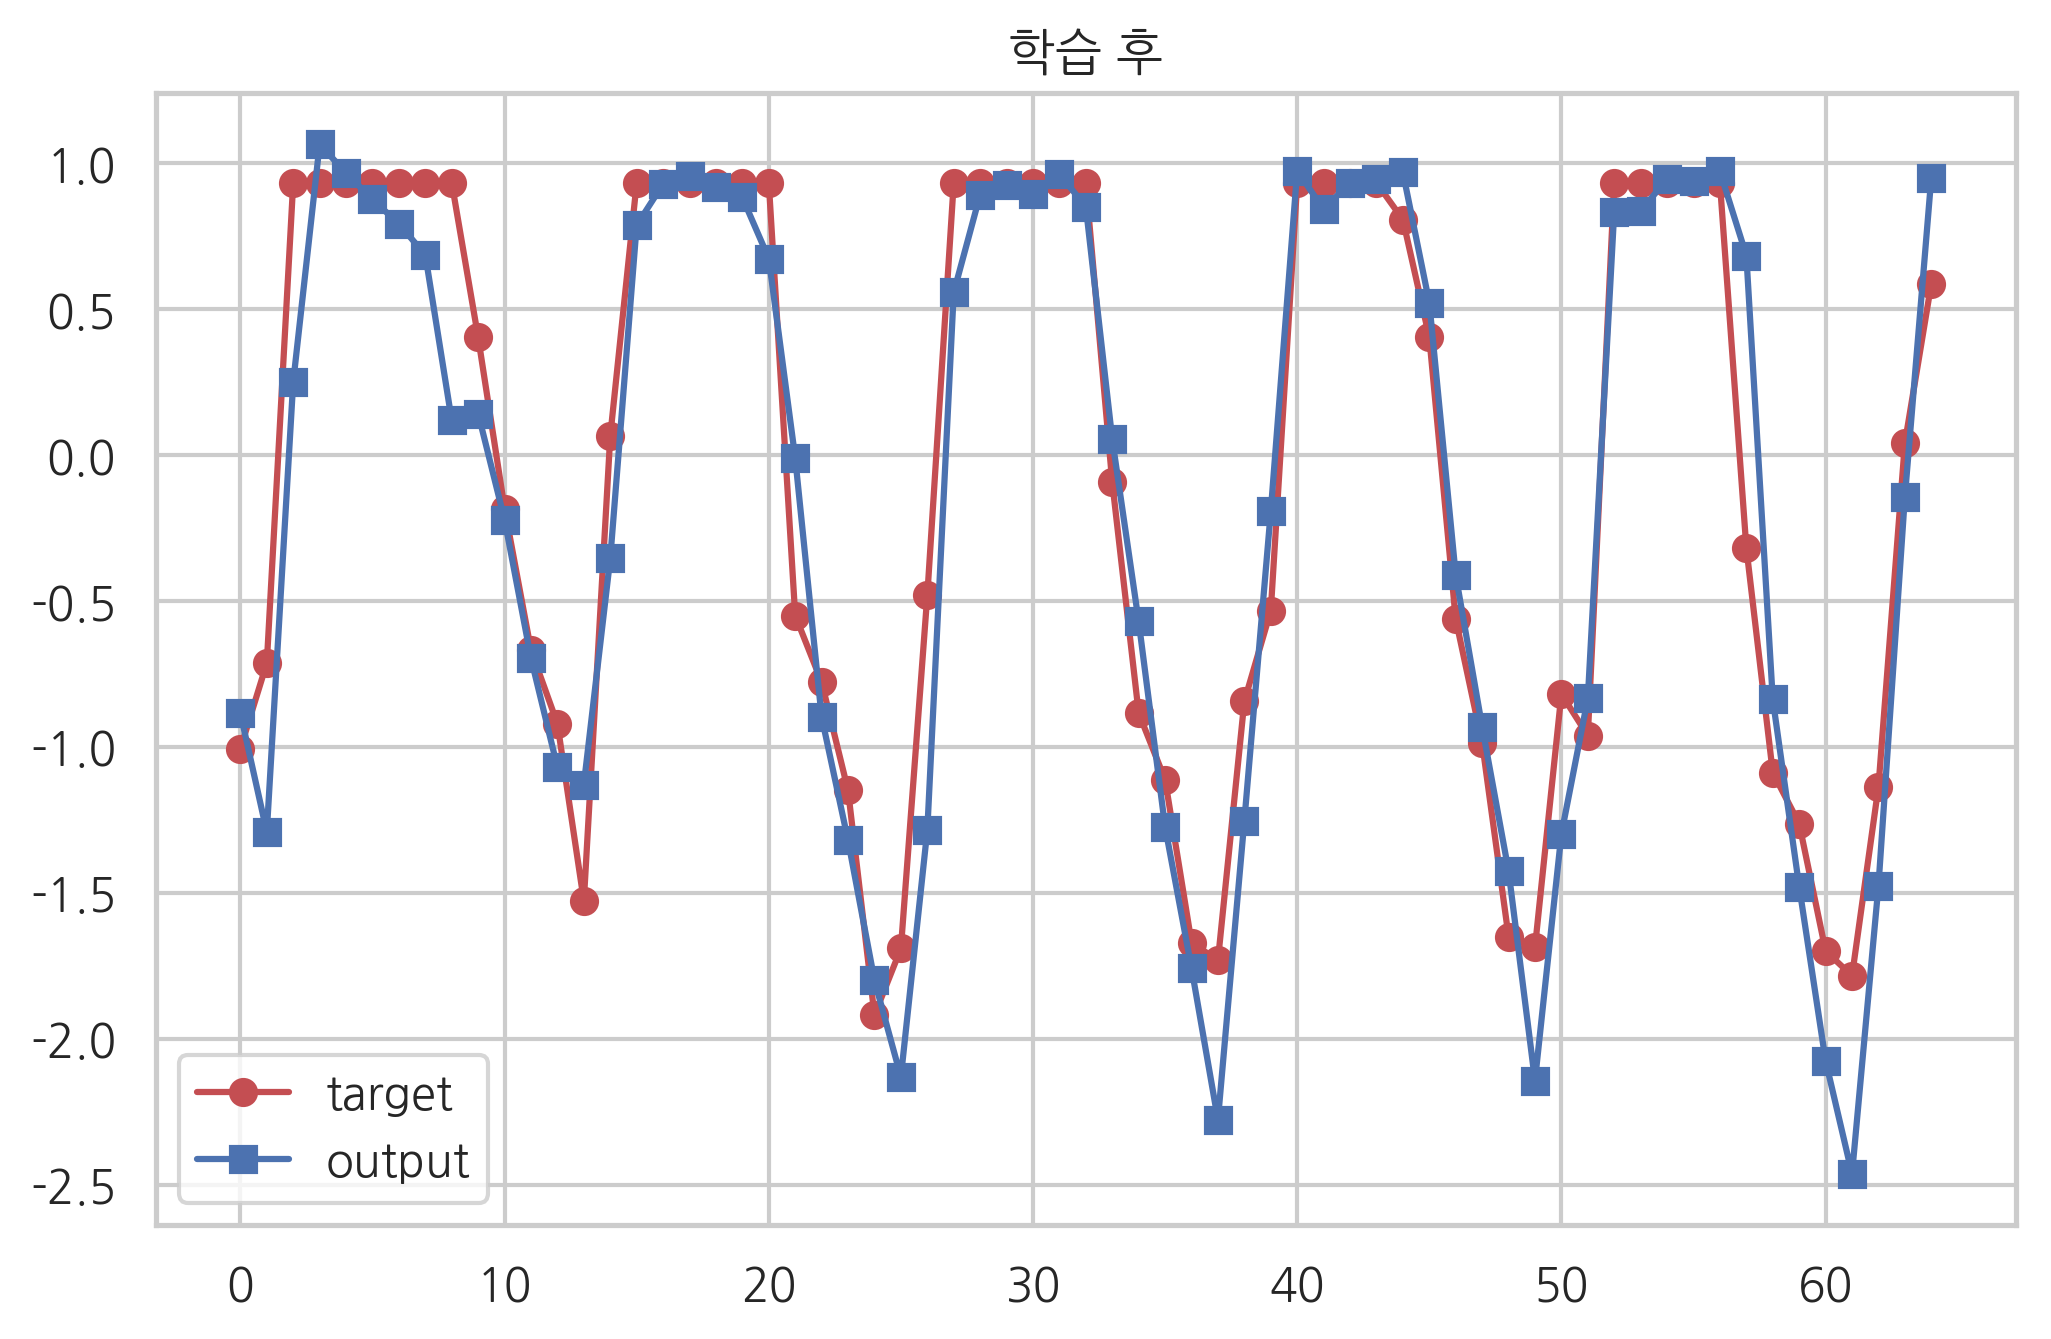

In [24]:
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("학습 후")
plt.show()